## 时序数据
时序数据一般都有时间节点
### 时序中的基本对象
- 时间戳
- 时间差
- 时间段
- 日期偏置

### 时间戳
 timestamp的构造与属性
 
 单个时间戳的生成利用 pd.Timestamp 实现，一般而言的常见日期格式都能被成功地转换

In [2]:
import pandas as pd
import numpy as np
ts = pd.Timestamp('2020/1/1')


In [3]:
ts

Timestamp('2020-01-01 00:00:00')

In [5]:
ts1 = pd.Timestamp('2020-1-1 08:10:30')

In [6]:
ts1

Timestamp('2020-01-01 08:10:30')

In [7]:
ts.year

2020

In [8]:
ts.month

1

In [9]:
ts.day

1

In [10]:
ts.hour

8

In [11]:
ts.minute

10

In [12]:
ts.second

30

通过 pd.Timestamp.max 和 pd.Timestamp.min 可以获取时间戳表示的范围，可以看到确实表示的区间年数大小正如上述计算结果

In [13]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [14]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [15]:
pd.Timestamp.max.year - pd.Timestamp.min.year

585

### Datetime序列的生成
一组时间戳可以组成时间序列，可以用 to_datetime 和 date_range 来生成。其中， to_datetime 能够把一列时间戳格式的对象转换成为 datetime64[ns] 类型的时间序列

In [16]:
pd.to_datetime(['2020-1-1', '2020-1-3', '2020-1-6'])

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-06'], dtype='datetime64[ns]', freq=None)

In [17]:
df = pd.read_csv("C:/Users/gen'ch/pandas学习/joyful-pandas-master/data/learn_pandas.csv")

In [18]:
s = pd.to_datetime(df.Test_Date)

In [19]:
s.head()

0   2019-10-05
1   2019-09-04
2   2019-09-12
3   2020-01-03
4   2019-11-06
Name: Test_Date, dtype: datetime64[ns]

In [20]:
temp = pd.to_datetime(['2020\\1\\1','2020\\1\\3'],format='%Y\\%m\\%d')

In [21]:
temp

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq=None)

In [22]:
pd.Series(temp).head()

0   2020-01-01
1   2020-01-03
dtype: datetime64[ns]

In [23]:
df_date_cols = pd.DataFrame({'year': [2020, 2020],
                             'month': [1, 1],
                             'day': [1, 2],
                             'hour': [10, 20],
                             'minute': [30, 50],
                             'second': [20, 40]})

In [24]:
pd.to_datetime(df_date_cols)

0   2020-01-01 10:30:20
1   2020-01-02 20:50:40
dtype: datetime64[ns]

In [25]:
pd.date_range('2020-1-1','2020-1-21', freq='10D')

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21'], dtype='datetime64[ns]', freq='10D')

In [26]:
pd.date_range('2020-1-1','2020-2-28', freq='10D')

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-01-31',
               '2020-02-10', '2020-02-20'],
              dtype='datetime64[ns]', freq='10D')

In [28]:
pd.date_range('2020-1-1',
              '2020-2-28', periods=6)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-12 14:24:00',
               '2020-01-24 04:48:00', '2020-02-04 19:12:00',
               '2020-02-16 09:36:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [29]:
s = pd.Series(np.random.rand(5),
              index=pd.to_datetime([
                  '2020-1-%d'%i for i in range(1,10,2)]))

In [30]:
s.head()

2020-01-01    0.833388
2020-01-03    0.322584
2020-01-05    0.861476
2020-01-07    0.556385
2020-01-09    0.699790
dtype: float64

In [31]:
s.asfreq('D').head()

2020-01-01    0.833388
2020-01-02         NaN
2020-01-03    0.322584
2020-01-04         NaN
2020-01-05    0.861476
Freq: D, dtype: float64

In [32]:
s.asfreq('12H').head()

2020-01-01 00:00:00    0.833388
2020-01-01 12:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 12:00:00         NaN
2020-01-03 00:00:00    0.322584
Freq: 12H, dtype: float64

### dt对象
如同 category, string 的序列上定义了 cat, str 来完成分类数据和文本数据的操作，在时序类型的序列上定义了 dt 对象来完成许多时间序列的相关操作。这里对于 datetime64[ns] 类型而言，可以大致分为三类操作：取出时间相关的属性、判断时间戳是否满足条件、取整操作。

第一类操作的常用属性包括： date, time, year, month, day, hour, minute, second, microsecond, nanosecond, dayofweek, dayofyear, weekofyear, daysinmonth, quarter ，其中 daysinmonth, quarter 分别表示该月一共有几天和季度。

In [33]:
s = pd.Series(pd.date_range('2020-1-1','2020-1-3', freq='D'))

In [34]:
s.dt.date

0    2020-01-01
1    2020-01-02
2    2020-01-03
dtype: object

In [35]:
s.dt.time

0    00:00:00
1    00:00:00
2    00:00:00
dtype: object

In [36]:
s.dt.day

0    1
1    2
2    3
dtype: int64

In [37]:
s.dt.daysinmonth

0    31
1    31
2    31
dtype: int64

In [38]:
s.dt.dayofweek

0    2
1    3
2    4
dtype: int64

In [39]:
s.dt.month_name()

0    January
1    January
2    January
dtype: object

In [40]:
s.dt.day_name()

0    Wednesday
1     Thursday
2       Friday
dtype: object

In [41]:
s.dt.is_year_start

0     True
1    False
2    False
dtype: bool

In [42]:
s.dt.is_year_end

0    False
1    False
2    False
dtype: bool

In [43]:
s = pd.Series(pd.date_range('2020-1-1 20:35:00',
                            '2020-1-1 22:35:00',
                            freq='45min'))

In [44]:
s

0   2020-01-01 20:35:00
1   2020-01-01 21:20:00
2   2020-01-01 22:05:00
dtype: datetime64[ns]

In [45]:
s.dt.round('1H')

0   2020-01-01 21:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

In [46]:
s.dt.ceil('1H')

0   2020-01-01 21:00:00
1   2020-01-01 22:00:00
2   2020-01-01 23:00:00
dtype: datetime64[ns]

In [47]:
s.dt.floor('1H')                                                              

0   2020-01-01 20:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

### 时间戳的切片和索引
一般而言，时间戳序列作为索引使用。如果想要选出某个子时间戳序列，第一类方法是利用 dt 对象和布尔条件联合使用，另一种方式是利用切片，后者常用于连续时间戳

In [48]:
s = pd.Series(np.random.randint(2,size=366),
              index=pd.date_range('2020-01-01','2020-12-31'))

In [49]:
idx = pd.Series(s.index).dt

In [50]:
s.head()

2020-01-01    0
2020-01-02    1
2020-01-03    0
2020-01-04    0
2020-01-05    1
Freq: D, dtype: int32

In [51]:
s[(idx.is_month_start|idx.is_month_end).values].head()

2020-01-01    0
2020-01-31    0
2020-02-01    0
2020-02-29    1
2020-03-01    0
dtype: int32

In [52]:
s[idx.dayofweek.isin([5,6]).values].head()

2020-01-04    0
2020-01-05    1
2020-01-11    1
2020-01-12    0
2020-01-18    0
dtype: int32

In [53]:
s['2020-01-01']

0

In [54]:
s['20200101']

0

In [55]:
s['2020-07'].head()

2020-07-01    0
2020-07-02    0
2020-07-03    1
2020-07-04    0
2020-07-05    1
Freq: D, dtype: int32

In [56]:
s['2020-05':'2020-7-15'].head()

2020-05-01    0
2020-05-02    0
2020-05-03    1
2020-05-04    1
2020-05-05    1
Freq: D, dtype: int32

In [57]:
s['2020-05':'2020-7-15'].tail()

2020-07-11    0
2020-07-12    1
2020-07-13    0
2020-07-14    1
2020-07-15    1
Freq: D, dtype: int32

### 时间差
Timedelta的生成



In [58]:
pd.Timestamp('20200102 08:00:00')-pd.Timestamp('20200101 07:35:00')

Timedelta('1 days 00:25:00')

In [59]:
pd.Timedelta(days=1, minutes=25) 

Timedelta('1 days 00:25:00')

In [60]:
pd.Timedelta('1 days 25 minutes') 

Timedelta('1 days 00:25:00')

In [61]:
s = pd.to_timedelta(df.Time_Record)

In [62]:
s.head()

0   0 days 00:04:34
1   0 days 00:04:20
2   0 days 00:05:22
3   0 days 00:04:08
4   0 days 00:05:22
Name: Time_Record, dtype: timedelta64[ns]

In [63]:
pd.timedelta_range('0s', '1000s', freq='6min')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:06:00', '0 days 00:12:00'], dtype='timedelta64[ns]', freq='6T')

In [64]:
pd.timedelta_range('0s', '1000s', periods=3)

TimedeltaIndex(['0 days 00:00:00', '0 days 00:08:20', '0 days 00:16:40'], dtype='timedelta64[ns]', freq=None)

In [65]:
s.dt.seconds.head()

0    274
1    260
2    322
3    248
4    322
Name: Time_Record, dtype: int64

In [66]:
s.dt.total_seconds().head()

0    274.0
1    260.0
2    322.0
3    248.0
4    322.0
Name: Time_Record, dtype: float64

In [67]:
pd.to_timedelta(df.Time_Record).dt.round('min').head()

0   0 days 00:05:00
1   0 days 00:04:00
2   0 days 00:05:00
3   0 days 00:04:00
4   0 days 00:05:00
Name: Time_Record, dtype: timedelta64[ns]

Timedelta的运算

In [68]:
td1 = pd.Timedelta(days=1)


In [69]:
td2 = pd.Timedelta(days=3)


In [70]:
ts = pd.Timestamp('20200101')


In [71]:
td1 * 2

Timedelta('2 days 00:00:00')

In [72]:
td2 - td1

Timedelta('2 days 00:00:00')

In [73]:
ts + td1

Timestamp('2020-01-02 00:00:00')

In [74]:
ts - td1

Timestamp('2019-12-31 00:00:00')

In [75]:
td1 = pd.timedelta_range(start='1 days', periods=5)


In [76]:
td2 = pd.timedelta_range(start='12 hours',freq='2H',periods=5)

In [77]:
ts = pd.date_range('20200101', '20200105')

In [78]:
td1 * 5

TimedeltaIndex(['5 days', '10 days', '15 days', '20 days', '25 days'], dtype='timedelta64[ns]', freq='5D')

In [79]:
td1 * pd.Series(list(range(5)))

0    0 days
1    2 days
2    6 days
3   12 days
4   20 days
dtype: timedelta64[ns]

In [80]:
td1 - td2

TimedeltaIndex(['0 days 12:00:00', '1 days 10:00:00', '2 days 08:00:00',
                '3 days 06:00:00', '4 days 04:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [81]:
td1 + pd.Timestamp('20200101')

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [82]:
td1 + ts

DatetimeIndex(['2020-01-02', '2020-01-04', '2020-01-06', '2020-01-08',
               '2020-01-10'],
              dtype='datetime64[ns]', freq=None)

### 日期偏置
Offset对象

In [83]:
pd.Timestamp('20200831') + pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-09-07 00:00:00')

In [84]:
pd.Timestamp('20200907') + pd.offsets.BDay(30)

Timestamp('2020-10-19 00:00:00')

In [85]:
pd.Timestamp('20200831') - pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-08-03 00:00:00')

In [86]:
pd.Timestamp('20200907') - pd.offsets.BDay(30)

Timestamp('2020-07-27 00:00:00')

In [87]:
pd.Timestamp('20200907') + pd.offsets.MonthEnd()

Timestamp('2020-09-30 00:00:00')

In [88]:
my_filter = pd.offsets.CDay(n=1,weekmask='Wed Fri',holidays=['20200109'])

In [89]:
dr = pd.date_range('20200108', '20200111')


In [90]:
dr.to_series().dt.dayofweek

2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
Freq: D, dtype: int64

In [91]:
[i + my_filter for i in dr]

[Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-15 00:00:00')]

### 偏置字符串
前面提到了关于 date_range 的 freq 取值可用 Offset 对象，同时在 pandas 中几乎每一个 Offset 对象绑定了日期偏置字符串（ frequencies strings/offset aliases ），可以指定 Offset 对应的字符串来替代使用。

In [92]:
pd.date_range('20200101','20200331', freq='MS')

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [93]:
pd.date_range('20200101','20200331', freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [94]:
pd.date_range('20200101','20200110', freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [95]:
pd.date_range('20200101','20200201', freq='W-MON')

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27'], dtype='datetime64[ns]', freq='W-MON')

In [96]:
pd.date_range('20200101','20200201',freq='WOM-1MON')

DatetimeIndex(['2020-01-06'], dtype='datetime64[ns]', freq='WOM-1MON')

In [97]:
pd.date_range('20200101','20200331',freq=pd.offsets.MonthBegin())

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [98]:
pd.date_range('20200101','20200331',freq=pd.offsets.MonthEnd())

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [99]:
pd.date_range('20200101','20200110', freq=pd.offsets.BDay())

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [101]:
pd.date_range('20200101','20200201',freq=pd.offsets.CDay(weekmask='Mon'))

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27'], dtype='datetime64[ns]', freq='C')

In [102]:
pd.date_range('20200101','20200201',
              freq=pd.offsets.WeekOfMonth(week=0,weekday=0))

DatetimeIndex(['2020-01-06'], dtype='datetime64[ns]', freq='WOM-1MON')

### 时序中的滑窗与分组
### 滑动窗口
所谓时序的滑窗函数，即把滑动窗口用 freq 关键词代替

In [103]:
import matplotlib.pyplot as plt

In [104]:
idx = pd.date_range('20200101', '20201231', freq='B')

In [105]:
np.random.seed(2020)

In [106]:
data = np.random.randint(-1,2,len(idx)).cumsum()

In [107]:
s = pd.Series(data,index=idx)


In [108]:
s.head()

2020-01-01   -1
2020-01-02   -2
2020-01-03   -1
2020-01-06   -1
2020-01-07   -2
Freq: B, dtype: int32

In [109]:
r = s.rolling('30D')

findfont: Font family ['simfang'] not found. Falling back to DejaVu Sans.


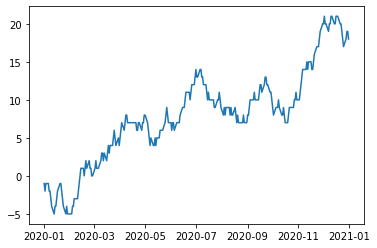

In [110]:
plt.plot(s)

Text(0.5, 1.0, 'BOLL LINES')

findfont: Font family ['simfang'] not found. Falling back to DejaVu Sans.


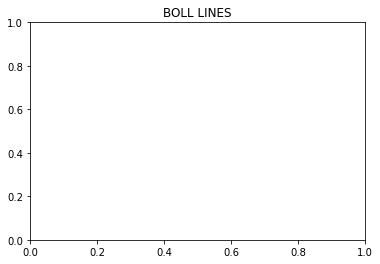

In [111]:
plt.title('BOLL LINES')

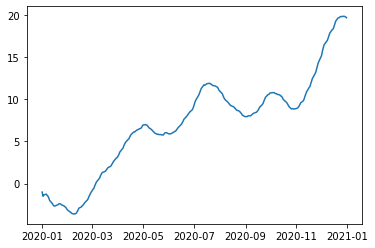

In [112]:
plt.plot(r.mean())

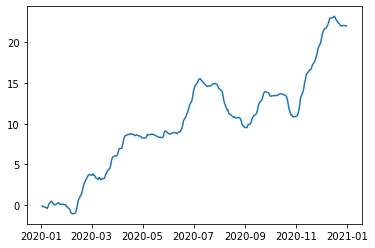

In [113]:
plt.plot(r.mean()+r.std()*2)

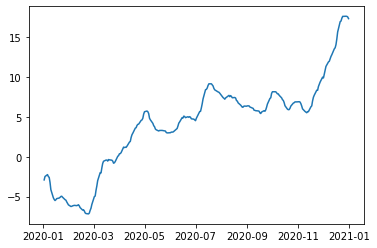

In [114]:
plt.plot(r.mean()-r.std()*2)

In [115]:
s.shift(freq='50D').head()

2020-02-20   -1
2020-02-21   -2
2020-02-22   -1
2020-02-25   -1
2020-02-26   -2
dtype: int32

In [116]:
my_series = pd.Series(s.index)

In [117]:
my_series.head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-06
4   2020-01-07
dtype: datetime64[ns]

In [118]:
my_series.diff(1).head()

0      NaT
1   1 days
2   1 days
3   3 days
4   1 days
dtype: timedelta64[ns]

In [119]:
s.resample('10D').mean().head()

2020-01-01   -2.000000
2020-01-11   -3.166667
2020-01-21   -3.625000
2020-01-31   -4.000000
2020-02-10   -0.375000
Freq: 10D, dtype: float64

In [120]:
s.resample('10D').apply(lambda x:x.max()-x.min()).head()

2020-01-01    3
2020-01-11    4
2020-01-21    4
2020-01-31    2
2020-02-10    4
Freq: 10D, dtype: int32

In [121]:
idx = pd.date_range('20200101 8:26:35', '20200101 9:31:58', freq='77s')


In [122]:
data = np.random.randint(-1,2,len(idx)).cumsum()

In [123]:
s = pd.Series(data,index=idx)

In [124]:
s.head()

2020-01-01 08:26:35   -1
2020-01-01 08:27:52   -1
2020-01-01 08:29:09   -2
2020-01-01 08:30:26   -3
2020-01-01 08:31:43   -4
Freq: 77S, dtype: int32

In [125]:
s.resample('7min').mean().head()

2020-01-01 08:24:00   -1.750000
2020-01-01 08:31:00   -2.600000
2020-01-01 08:38:00   -2.166667
2020-01-01 08:45:00    0.200000
2020-01-01 08:52:00    2.833333
Freq: 7T, dtype: float64

In [126]:
s.resample('7min', origin='start').mean().head()

2020-01-01 08:26:35   -2.333333
2020-01-01 08:33:35   -2.400000
2020-01-01 08:40:35   -1.333333
2020-01-01 08:47:35    1.200000
2020-01-01 08:54:35    3.166667
Freq: 7T, dtype: float64

In [127]:
s = pd.Series(np.random.randint(2,size=366),
              index=pd.date_range('2020-01-01','2020-12-31'))

In [128]:
s.resample('M').mean().head()

2020-01-31    0.451613
2020-02-29    0.448276
2020-03-31    0.516129
2020-04-30    0.566667
2020-05-31    0.451613
Freq: M, dtype: float64

In [129]:
s.resample('MS').mean().head()

2020-01-01    0.451613
2020-02-01    0.448276
2020-03-01    0.516129
2020-04-01    0.566667
2020-05-01    0.451613
Freq: MS, dtype: float64